<a href="https://colab.research.google.com/github/mkyz108/Telecom-Data-Analysis-Project-to-Improve-Service-Quality/blob/main/Copy_of_Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# Reload the data with the correct header
data = pd.read_csv("1.csv", header=1)  # Setting the second row as header (index 1 because of 0-indexing)

# Display the first few rows of the dataframe with correct headers
data.head()


,Date/Time,Reading,Activation Status,Validation Status,Estimation Type
0,11/4/2023 12:00 AM,91560.0,Active,Valid,None
1,11/3/2023 12:00 AM,91510.0,Active,Valid,None
2,11/2/2023 12:00 AM,91460.0,Active,Valid,None
3,11/1/2023 12:00 AM,91410.0,Active,Valid,None
4,10/31/2023 12:00 AM,91380.0,Active,Valid,None


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# Calculate the differences between consecutive readings to identify large jumps or drops
data['Reading_Diff'] = data['Reading'].diff().abs()

# We can then define a threshold for what we would consider an 'unusual' jump.
# For now, let's set an arbitrary threshold at the 95th percentile of the differences.
threshold = data['Reading_Diff'].quantile(0.95)

# Any difference greater than this threshold could be considered unusual
unusual_jumps = data[data['Reading_Diff'] > threshold]

unusual_jumps


,Date/Time,Reading,Activation Status,Validation Status,Estimation Type,Reading_Diff
5,10/30/2023 12:00 AM,91260.0,Active,Valid,None,120.0
18,10/17/2023 12:00 AM,90660.0,Active,Valid,None,100.0
22,10/13/2023 12:00 AM,90400.0,Active,Valid,None,100.0
23,10/12/2023 12:00 AM,90280.0,Active,Valid,None,120.0
26,10/9/2023 12:00 AM,90140.0,Active,Valid,None,90.0
33,10/2/2023 12:00 AM,89750.0,Active,Valid,None,100.0
48,9/17/2023 12:00 AM,88980.0,Active,Valid,None,90.0
55,9/10/2023 12:00 AM,88620.0,Active,Valid,None,150.0
57,9/8/2023 12:00 AM,88420.0,Active,Valid,None,140.0
58,9/7/2023 12:00 AM,88320.0,Active,Valid,None,100.0


In [ ]:
# Based on the new information, we will consider any daily difference greater than 80 gallons as an outlier
outlier_threshold = 80

# Identify potential outliers where the daily difference in readings exceeds 80 gallons
outliers = data[data['Reading_Diff'] > outlier_threshold]

outliers


,Date/Time,Reading,Activation Status,Validation Status,Estimation Type,Reading_Diff
5,10/30/2023 12:00 AM,91260.0,Active,Valid,None,120.0
18,10/17/2023 12:00 AM,90660.0,Active,Valid,None,100.0
22,10/13/2023 12:00 AM,90400.0,Active,Valid,None,100.0
23,10/12/2023 12:00 AM,90280.0,Active,Valid,None,120.0
26,10/9/2023 12:00 AM,90140.0,Active,Valid,None,90.0
33,10/2/2023 12:00 AM,89750.0,Active,Valid,None,100.0
48,9/17/2023 12:00 AM,88980.0,Active,Valid,None,90.0
55,9/10/2023 12:00 AM,88620.0,Active,Valid,None,150.0
57,9/8/2023 12:00 AM,88420.0,Active,Valid,None,140.0
58,9/7/2023 12:00 AM,88320.0,Active,Valid,None,100.0


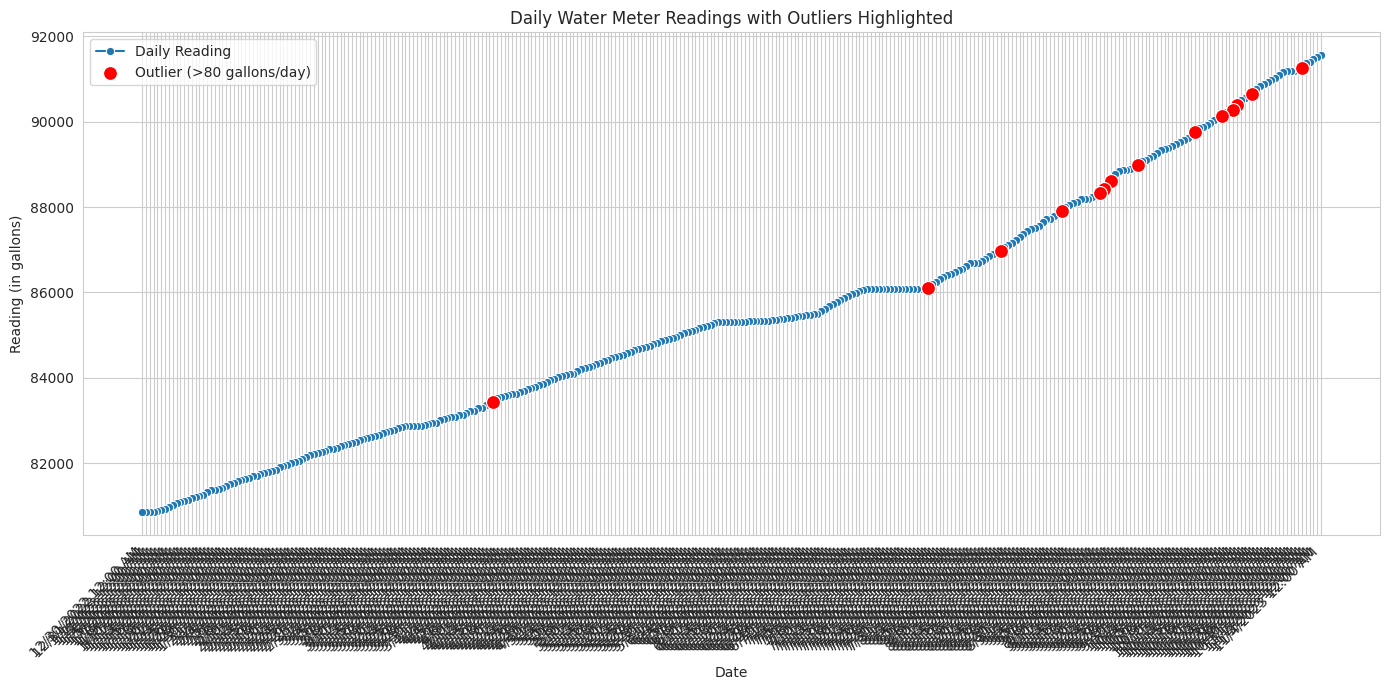

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the seaborn plots
sns.set_style("whitegrid")

# Plotting the data with outliers highlighted in red
plt.figure(figsize=(14, 7))

# Plot all readings as a line
sns.lineplot(data=data, x='Date/Time', y='Reading', label='Daily Reading', marker='o')

# Highlight outliers on the same plot
sns.scatterplot(data=outliers, x='Date/Time', y='Reading', color='red', label='Outlier (>80 gallons/day)', s=100, zorder=5)

# Improve the readability of the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Date')  # X-axis label
plt.ylabel('Reading (in gallons)')  # Y-axis label
plt.title('Daily Water Meter Readings with Outliers Highlighted')  # Title of the plot
plt.legend(loc='upper left')  # Position the legend
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap

# Since the dates are not in sequential order, we sort the index for the plot.
plt.gca().invert_xaxis()  # Invert x-axis to have the earliest date on the left

# Show the plot
plt.show()


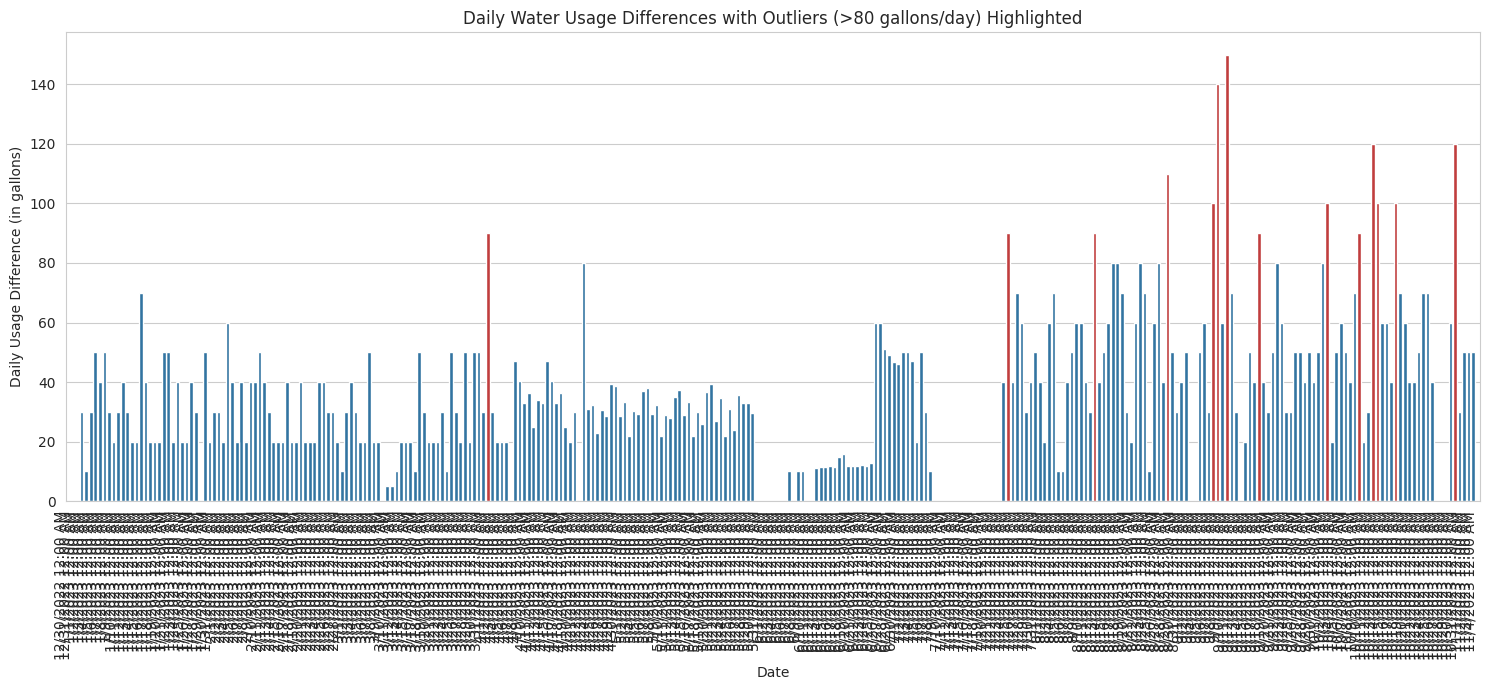

In [ ]:
# Plotting a bar chart of daily differences
plt.figure(figsize=(15, 7))

# Create a bar plot for the 'Reading_Diff' column
sns.barplot(data=data, x='Date/Time', y='Reading_Diff', palette=["#1f77b4" if (x <= outlier_threshold or pd.isna(x)) else "#d62728" for x in data['Reading_Diff']])

# Improve the readability of the plot
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Date')  # X-axis label
plt.ylabel('Daily Usage Difference (in gallons)')  # Y-axis label
plt.title('Daily Water Usage Differences with Outliers (>80 gallons/day) Highlighted')  # Title of the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap

# Since the dates are not in sequential order, we sort the index for the plot.
plt.gca().invert_xaxis()  # Invert x-axis to have the earliest date on the left

# Show the plot
plt.show()


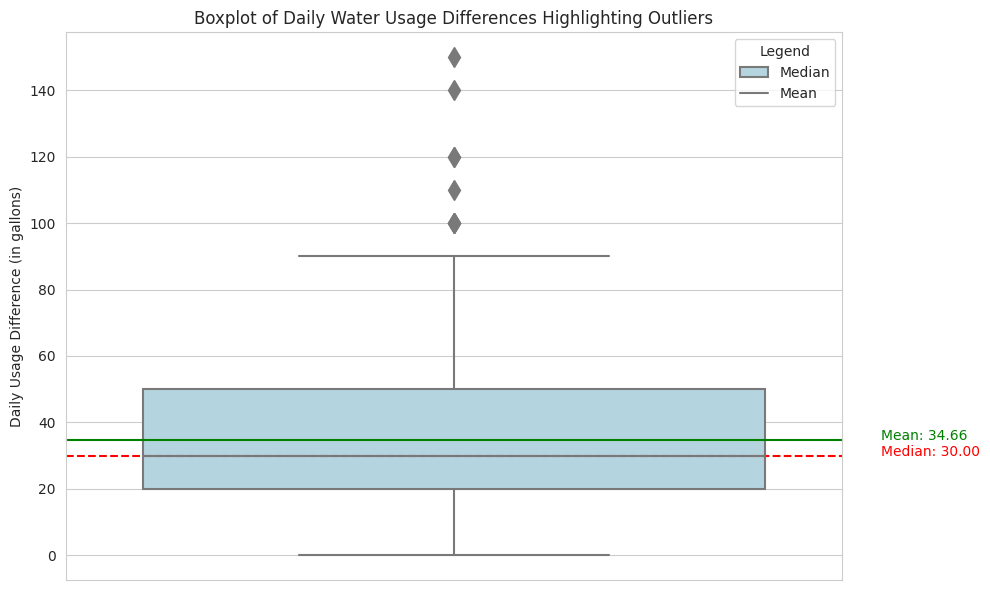

In [ ]:
# Box-and-whisker plot for daily usage differences
plt.figure(figsize=(10, 6))

# Creating the boxplot
sns.boxplot(y=data['Reading_Diff'], color="lightblue", fliersize=10)

# Highlight the median and mean
median = data['Reading_Diff'].median()
mean = data['Reading_Diff'].mean()

plt.axhline(median, color='r', linestyle='--')
plt.axhline(mean, color='g', linestyle='-')

plt.legend({'Median': median, 'Mean': mean}, title="Legend")

# Adding annotations for median and mean
plt.text(x=0.55, y=median, s=f'Median: {median:.2f}', color='red')
plt.text(x=0.55, y=mean, s=f'Mean: {mean:.2f}', color='green')

# Improve the readability of the plot
plt.xlabel('')  # No need for x-axis label in boxplot
plt.ylabel('Daily Usage Difference (in gallons)')  # Y-axis label
plt.title('Boxplot of Daily Water Usage Differences Highlighting Outliers')  # Title of the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap

# Show the plot
plt.show()


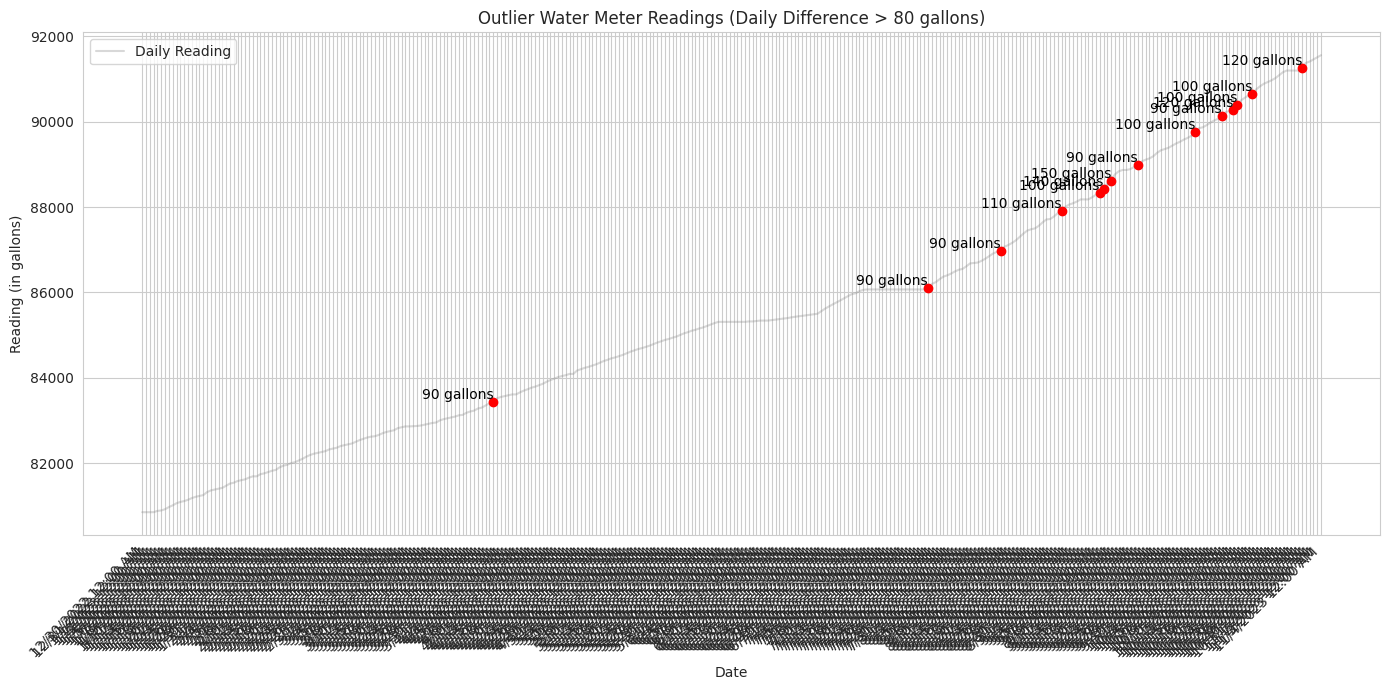

In [ ]:
# Simplified line graph for outliers only
plt.figure(figsize=(14, 7))

# Plot a line for all readings as a baseline (in a muted color)
sns.lineplot(data=data, x='Date/Time', y='Reading', label='Daily Reading', color='grey', alpha=0.3)

# Plot only the outliers with annotations
for index, row in outliers.iterrows():
    plt.plot(row['Date/Time'], row['Reading'], 'ro')  # Red dot for outliers
    plt.text(row['Date/Time'], row['Reading'], f"{int(row['Reading_Diff'])} gallons", color='black',
             ha='right', va='bottom')  # Annotate the outlier with the reading difference

# Improve the readability of the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Date')  # X-axis label
plt.ylabel('Reading (in gallons)')  # Y-axis label
plt.title('Outlier Water Meter Readings (Daily Difference > 80 gallons)')  # Title of the plot
plt.legend(loc='upper left')  # Position the legend
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap

# Since the dates are not in sequential order, we sort the index for the plot.
plt.gca().invert_xaxis()  # Invert x-axis to have the earliest date on the left

# Show the plot
plt.show()


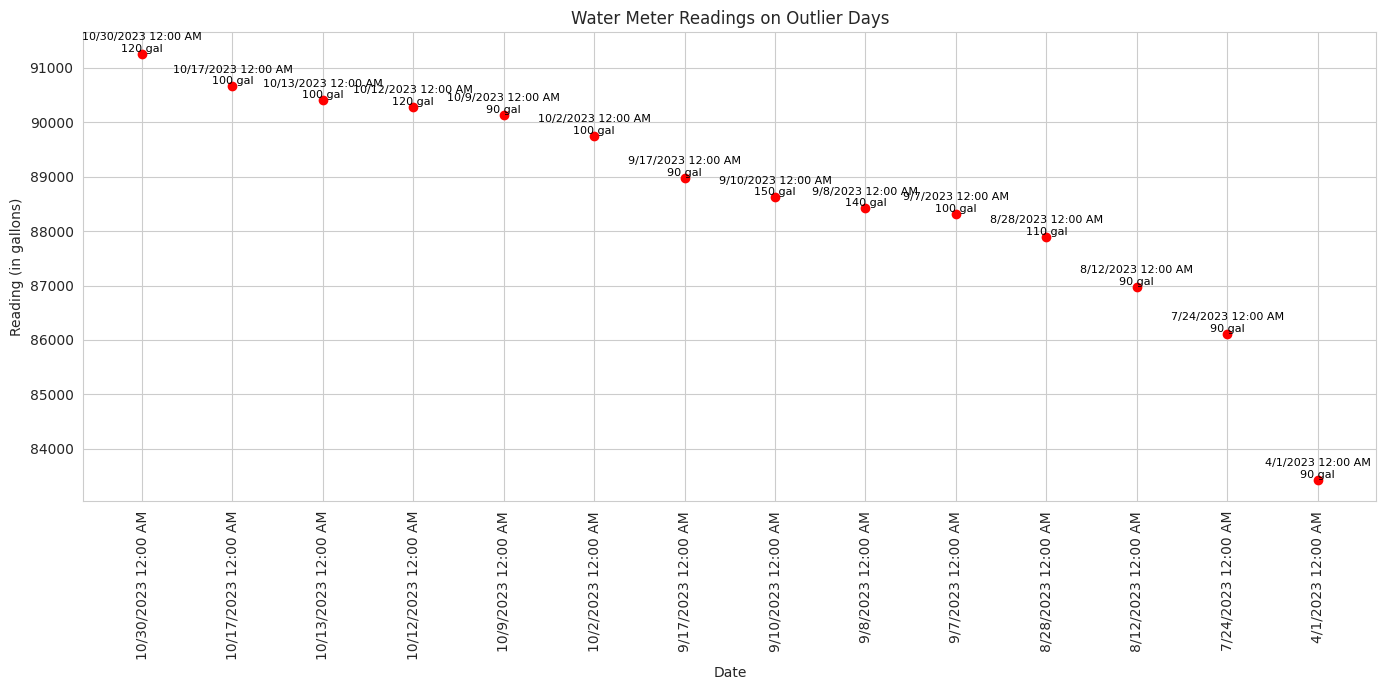

In [ ]:
# Create a scatter plot for the outliers with annotations for dates
plt.figure(figsize=(14, 7))

# Plot only the outliers with annotations
for index, row in outliers.iterrows():
    plt.scatter(row['Date/Time'], row['Reading'], color='red')  # Red dot for outliers
    plt.text(row['Date/Time'], row['Reading'], f"{row['Date/Time']}\n{int(row['Reading_Diff'])} gal",
             color='black', ha='center', va='bottom', fontsize=8)  # Annotate the outlier with date and reading difference

# Improve the readability of the plot
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels for better readability
plt.xlabel('Date')  # X-axis label
plt.ylabel('Reading (in gallons)')  # Y-axis label
plt.title('Water Meter Readings on Outlier Days')  # Title of the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap

# Show the plot
plt.show()


<ipython-input-22-3313f17aeb66>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Date'] = pd.to_datetime(outliers['Date/Time']).dt.date


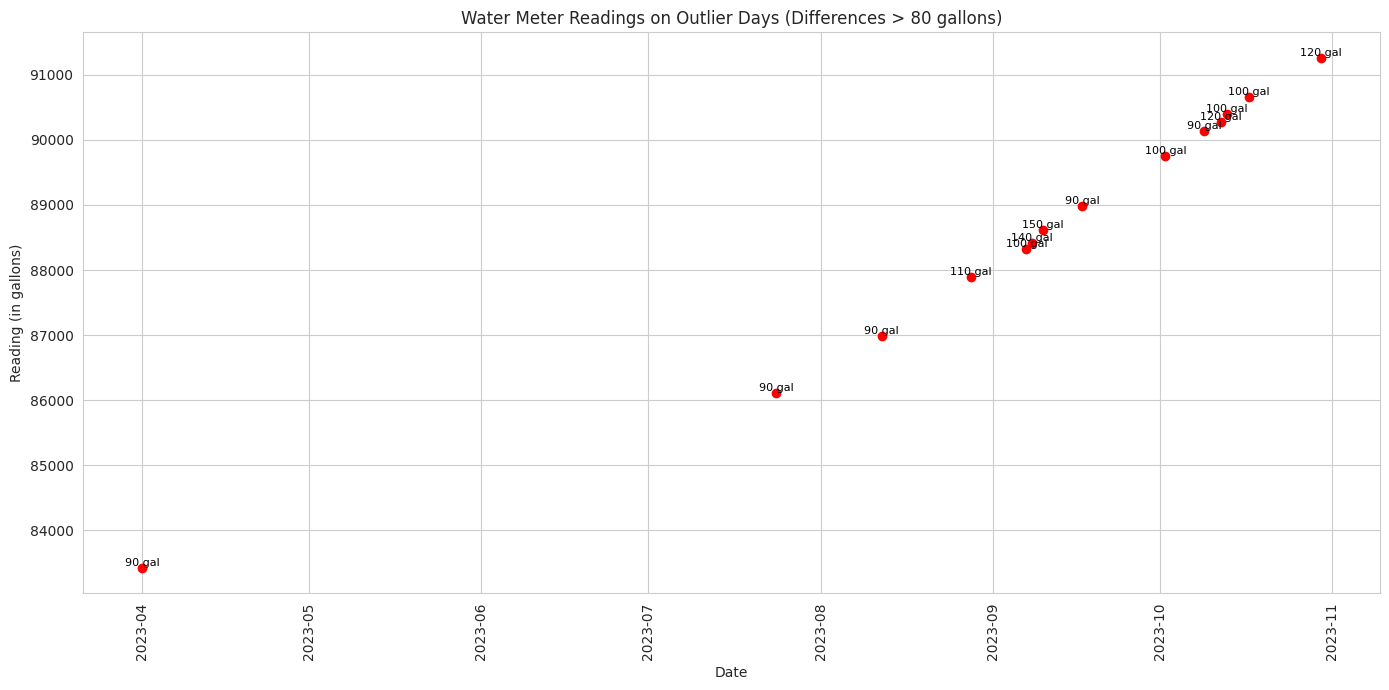

In [ ]:
# Adjusting the scatter plot for outliers to remove the top date from the annotation
# and to ensure that only the date (not the time) is shown on the x-axis.

# Convert 'Date/Time' to datetime and then to date to remove time
outliers['Date'] = pd.to_datetime(outliers['Date/Time']).dt.date

plt.figure(figsize=(14, 7))

# Plot only the outliers with annotations for the reading difference
for index, row in outliers.iterrows():
    plt.scatter(row['Date'], row['Reading'], color='red')  # Red dot for outliers
    plt.text(row['Date'], row['Reading'], f"{int(row['Reading_Diff'])} gal",
             color='black', ha='center', va='bottom', fontsize=8)  # Annotate the outlier with reading difference

# Improve the readability of the plot
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels for better readability
plt.xlabel('Date')  # X-axis label
plt.ylabel('Reading (in gallons)')  # Y-axis label
plt.title('Water Meter Readings on Outlier Days (Differences > 80 gallons)')  # Title of the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap

# Show the plot
plt.show()


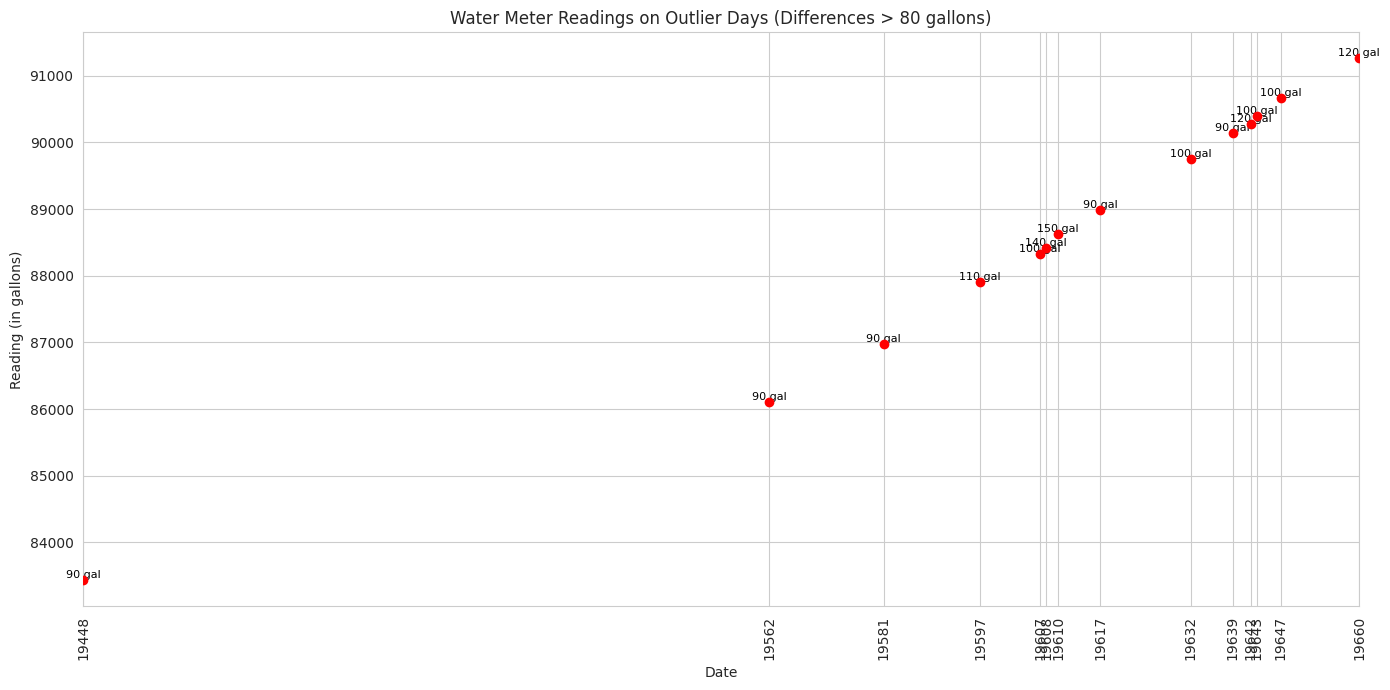

In [ ]:
# Creating a scatter plot with correct alignment of dates and outliers

plt.figure(figsize=(14, 7))

# We will set the x-ticks to be exactly the dates where outliers are present
unique_outlier_dates = outliers['Date'].unique()
plt.xticks(unique_outlier_dates, rotation=90, ha='center')  # Set x-ticks to outlier dates

# Plot the outliers
plt.scatter(outliers['Date'], outliers['Reading'], color='red', zorder=5)

# Annotate the outliers with the reading difference
for index, row in outliers.iterrows():
    plt.text(row['Date'], row['Reading'], f"{int(row['Reading_Diff'])} gal",
             color='black', ha='center', va='bottom', fontsize=8)

# Set the x-axis limits to include only the range of the outlier dates
plt.xlim([unique_outlier_dates.min(), unique_outlier_dates.max()])

plt.xlabel('Date')  # X-axis label
plt.ylabel('Reading (in gallons)')  # Y-axis label
plt.title('Water Meter Readings on Outlier Days (Differences > 80 gallons)')  # Title of the plot

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap

# Show the plot
plt.show()


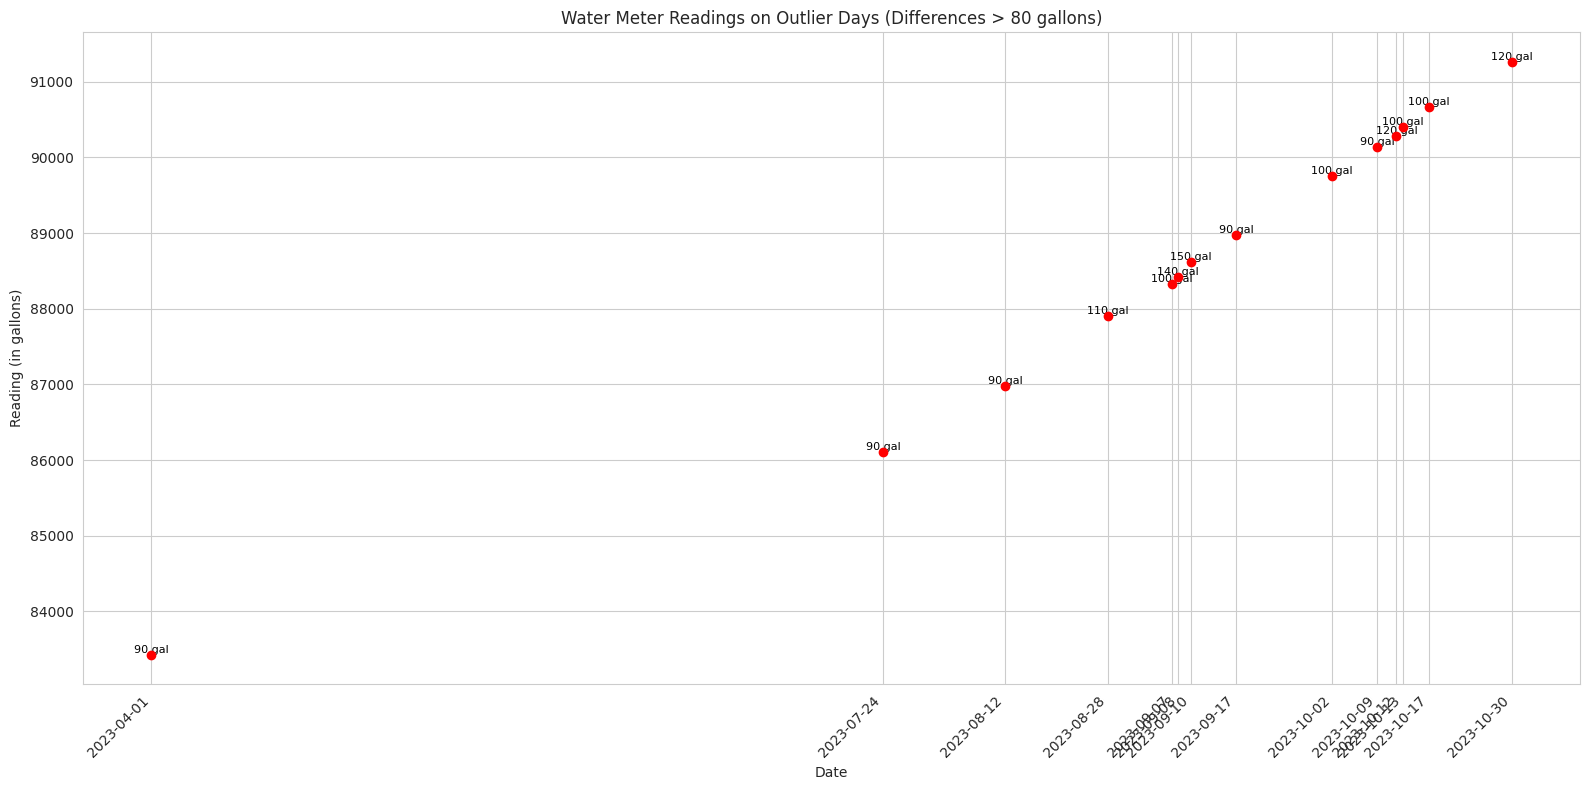

In [ ]:
# Adjusting the scatter plot again for better visibility of dates

# First, we need to sort the outliers by date to make sure they are in order
outliers_sorted = outliers.sort_values(by='Date')

plt.figure(figsize=(16, 8))  # Increased figure size for more space

# Plot the outliers
plt.scatter(outliers_sorted['Date'], outliers_sorted['Reading'], color='red', zorder=5)

# Annotate the outliers with the reading difference
for index, row in outliers_sorted.iterrows():
    plt.text(row['Date'], row['Reading'], f"{int(row['Reading_Diff'])} gal",
             color='black', ha='center', va='bottom', fontsize=8)

# Set the x-ticks to be exactly the dates where outliers are present and format the dates
plt.xticks(outliers_sorted['Date'], [date.strftime('%Y-%m-%d') for date in outliers_sorted['Date']], rotation=45, ha='right')

plt.xlabel('Date')  # X-axis label
plt.ylabel('Reading (in gallons)')  # Y-axis label
plt.title('Water Meter Readings on Outlier Days (Differences > 80 gallons)')  # Title of the plot

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap

# Show the plot
plt.show()


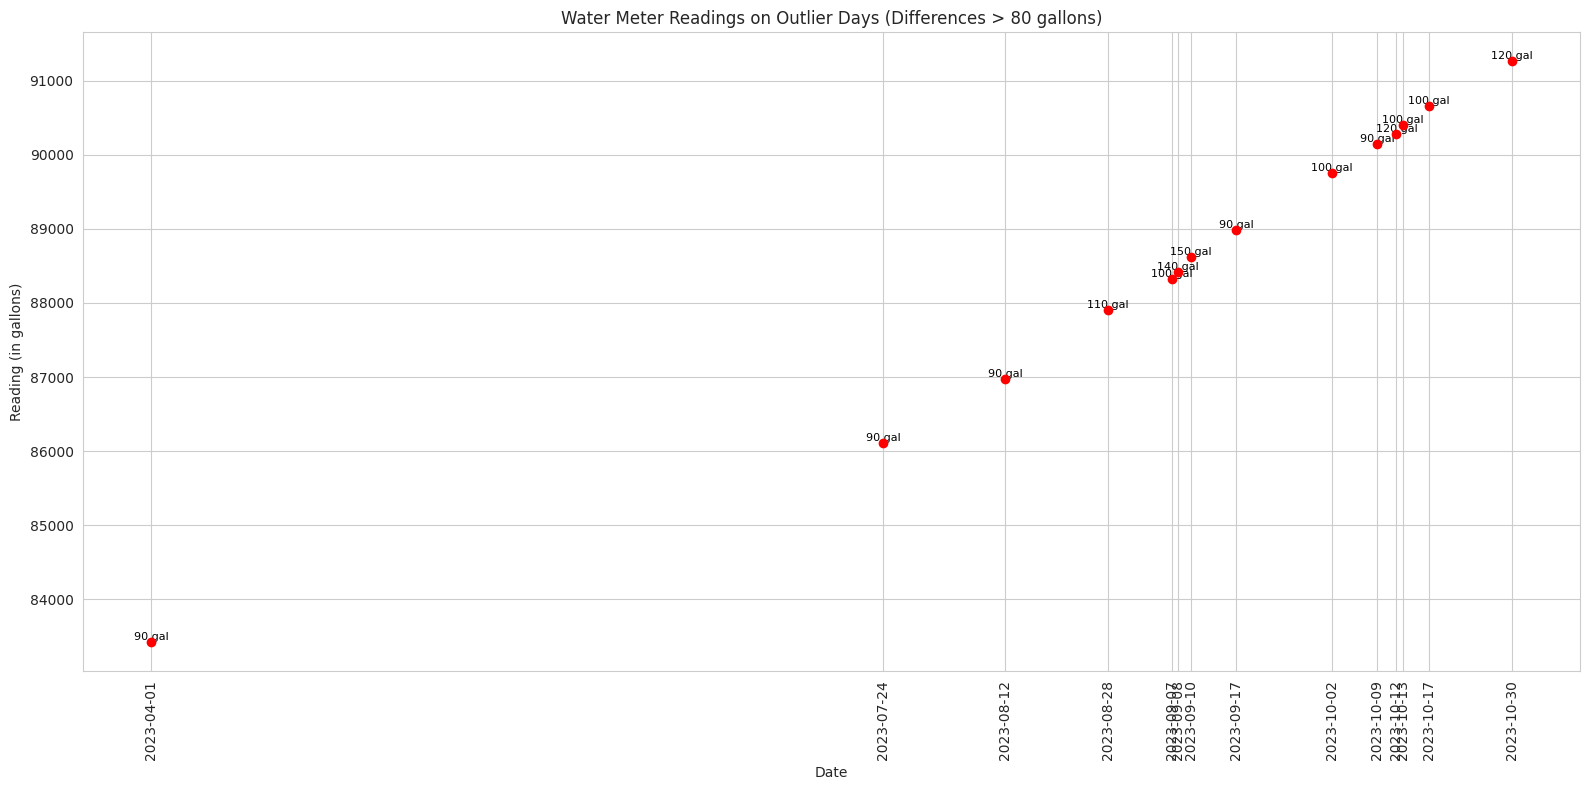

In [ ]:
# Adjusting the scatter plot to display the dates vertically

plt.figure(figsize=(16, 8))  # Increased figure size for more space

# Plot the outliers
plt.scatter(outliers_sorted['Date'], outliers_sorted['Reading'], color='red', zorder=5)

# Annotate the outliers with the reading difference
for index, row in outliers_sorted.iterrows():
    plt.text(row['Date'], row['Reading'], f"{int(row['Reading_Diff'])} gal",
             color='black', ha='center', va='bottom', fontsize=8)

# Set the x-ticks to be exactly the dates where outliers are present and format the dates
plt.xticks(outliers_sorted['Date'], [date.strftime('%Y-%m-%d') for date in outliers_sorted['Date']], rotation=90, ha='center')

plt.xlabel('Date')  # X-axis label
plt.ylabel('Reading (in gallons)')  # Y-axis label
plt.title('Water Meter Readings on Outlier Days (Differences > 80 gallons)')  # Title of the plot

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap

# Show the plot
plt.show()
